# Deep Learning Project 3

### Importing all the important libraries

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

## Step 2. Develop a Baseline Neural Network Model

In [2]:
dataframe = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [3]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### define base model

In [5]:
def baseline_model():
    model=models.Sequential()
    model.add(Dense(13, activation='relu',input_shape=(13,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

### fix random seed for reproducibility

In [35]:
seed=7
np.random.seed(seed)

### evaluate model with standardized dataset

In [117]:
estimator=KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [124]:
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -34.22 (12.40) MSE


In [122]:
results

-34.45583989328029

## Step 3: Modeling The Standardized Dataset

In [10]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -26.94 (32.53) MSE


## Extension of Step 3:

### Normalizing The Output Data

In [11]:
mean=np.mean(Y)
std=np.std(Y)
Y_mean=Y-mean
Y_std=Y_mean/std
Y_std

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288,
        0.6712218 ,  0.03996443,  0.49708184, -0.65659542, -0.39538548,
       -0.81985164, -0.39538548, -0.09064054, -0.23212926, -0.47157171,
       -0.286548  ,  0.06173193, -0.54775795, -0.25389676, -0.47157171,
       -0.97222411, -0.31919924, -0.79808414, -0.87427038, -0.75454915,
       -0.93957286, -0.64571167, -0.84161913, -0.44980422, -0.16682677,
       -1.07017784, -0.87427038, -1.0157591 , -1.02664285, -0.98310786,
       -0.39538548, -0.27566425, -0.16682677,  0.23587189,  0.89978051,
        1.34601416,  0.4426631 ,  0.30117438,  0.23587189, -0.14505928,
       -0.35185049, -0.27566425, -0.64571167, -0.88515413, -0.34096674,
       -0.30831549, -0.22124551,  0.26852314,  0.09438317, -0.39538548,
        1.4004329 ,  0.23587189,  0.98685049,  0.08349942, -0.31919924,
       -0.41715297, -0.71101416, -0.0362218 ,  0.26852314,  1.13922296,
        0.10526692, -0.34096674, -0.0579893 , -0.55864169, -0.17

In [12]:
def baseline_model_2():
    model=models.Sequential()
    model.add(Dense(13, activation='relu',input_shape=(13,)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model_2, epochs=50, batch_size=5, verbose=0)))
#estimator=KerasRegressor(build_fn=baseline_model_2, epochs=50, batch_size=5, verbose=0)
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y_std, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -0.64 (0.57) MSE


In [13]:
results

array([-0.32356018, -0.12412748, -0.31881628, -0.80781643, -0.43224304,
       -0.5589637 , -0.13075813, -2.07316681, -1.23549076, -0.3876159 ])

## Step 4. Tuning The Neural Network Topology

### Step 4.1. Evaluate a Deeper Network Topology

In [14]:
def larger_model():
    model=models.Sequential()
    model.add(Dense(6, activation='relu',input_shape=(13,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
    
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Larger: -30.08 (24.95) MSE


### Step 4.2. Evaluate a Wider Network Topology

In [15]:
def wider_model():
    model=models.Sequential()
    model.add(Dense(20, activation='relu',input_shape=(13,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -21.28 (21.84) MSE


## Step 5. Really Scaling up: developing a model that overfits

### training for 100 epochs

In [58]:
k=10
num_val_samples = len(X) // k
num_epochs = 100
val_mean_absolute_error=[]
val_loss=[]
np.random.seed(seed)
for i in range(k):
    print('processing fold #', i)
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Y[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([X[:i * num_val_samples],
                                         X[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([Y[:i * num_val_samples],
                                            Y[(i + 1) * num_val_samples:]],axis=0)
    
    model=baseline_model()
    history=model.fit(partial_train_data,partial_train_targets,shuffle=True,epochs=num_epochs,validation_data=(val_data,val_targets)
                      ,batch_size=5,verbose=0)
    
    val_loss.append(history.history['val_loss'])
    val_mean_absolute_error.append(history.history['val_mean_absolute_error'])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [59]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [60]:
val_mean_absolute_error=np.mean(val_mean_absolute_error,axis=0)

In [61]:
val_loss=np.mean(val_loss,axis=0)

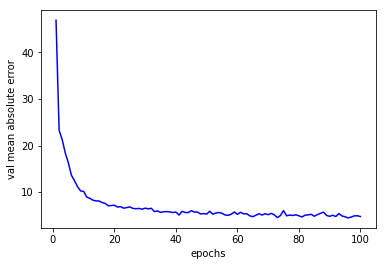

In [62]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_epochs+1),val_mean_absolute_error,'b')
plt.xlabel("epochs")
plt.ylabel("val mean absolute error")
plt.show()

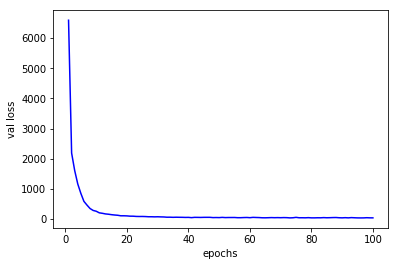

In [63]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_epochs+1),val_loss,'b')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()

## Step 6. Tuning the Model

### training for 100 epochs making model overfit , setting epochs=35

In [66]:
np.mean(val_mean_absolute_error)

201.79951599828007

In [92]:
k=10
num_val_samples = len(X) // k
num_epochs = 35
val_mean_absolute_error=[]
val_loss=[]
np.random.seed(seed)
for i in range(k):
    print('processing fold #', i)
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Y[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([X[:i * num_val_samples],
                                         X[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([Y[:i * num_val_samples],
                                            Y[(i + 1) * num_val_samples:]],axis=0)
    
    model=baseline_model()
    history=model.fit(partial_train_data,partial_train_targets,shuffle=True,epochs=num_epochs,validation_data=(val_data,val_targets)
                      ,batch_size=5,verbose=0)
    
    val_loss.append(history.history['val_loss'])
    val_mean_absolute_error.append(history.history['val_mean_absolute_error'])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [93]:
val_mean_absolute_error=np.mean(val_mean_absolute_error,axis=0)
val_loss=np.mean(val_loss,axis=0)

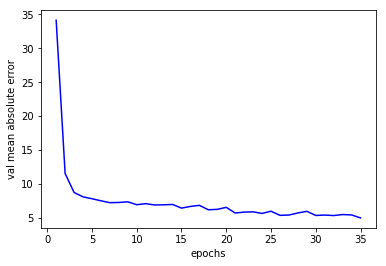

In [94]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_epochs+1),val_mean_absolute_error,'b')
plt.xlabel("epochs")
plt.ylabel("val mean absolute error")
plt.show()

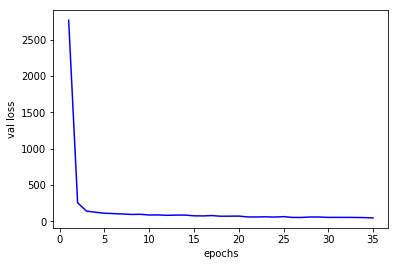

In [95]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_epochs+1),val_loss,'b')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()

## Step 7. Rewriting the code using the Keras Functional API

In [7]:
def create_baseline_3():
    inputs=keras.layers.Input(shape=(13,))
    x=layers.Dense(13,activation='relu')(inputs)
    outputs=layers.Dense(1)(x)

    model=keras.Model(inputs,outputs)
    model.compile(optimizer='adam',loss='mse',metrics=['mae'])
    return model

np.random.seed(seed)

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=create_baseline_3, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Wider: -25.56 (34.86) MSE


## Step 8. Rewriting the code by doing Model Subclassing

In [15]:
def create_baseline_4():
    class MyModel(tf.keras.Model):
        def __init__(self):
            super(MyModel,self).__init__()
            self.dense1 = Dense(13, activation="relu")
            self.dense2 = Dense(13, activation='relu')
            self.dense3 = Dense(1)


        def call(self,inputs):
            x = self.dense1(inputs)
            x = self.dense2(x)
            return self.dense3(x)

    model=MyModel()
    model.compile(loss='mse',optimizer='adam',metrics=['mae'])
    return model

np.random.seed(seed)

np.random.seed(seed)

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=create_baseline_4, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -579.65 (69.92) MSE


## Step 9: Without Skit-learn Library

In [27]:
k=10
num_val_samples = len(X) // k
num_epochs = 35
val_loss=[]
val_mean_absolute_error=[]
np.random.seed(seed)
for i in range(k):
    print('processing fold #', i)
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Y[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([X[:i * num_val_samples],
                                         X[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([Y[:i * num_val_samples],
                                            Y[(i + 1) * num_val_samples:]],axis=0)
    
    model=baseline_model()
    history=model.fit(partial_train_data,partial_train_targets,shuffle=True,epochs=num_epochs,validation_data=(val_data,val_targets)
                      ,batch_size=5,verbose=0)
    
    val_loss.append(history.history['val_loss'])
    val_mean_absolute_error.append(history.history['val_mean_absolute_error'])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


### Validation accuracy is found to be:

In [28]:
np.mean(np.mean(val_mean_absolute_error,axis=0))

7.367215489251272

### Validation loss is found to be:

In [29]:
np.mean(np.mean(val_loss,axis=0))

155.8701762980904

In [30]:
val_mean_absolute_error=np.mean(val_mean_absolute_error,axis=0)

In [33]:
val_mean_absolute_error

array([33.18750126, 11.78579473,  8.77091706,  8.15424571,  7.86099117,
        7.31738108,  7.36372257,  7.42131756,  7.299139  ,  7.31500458,
        7.0378028 ,  6.80597574,  6.91251992,  6.68637396,  6.46923113,
        7.16157026,  6.54920821,  6.20232382,  6.18313129,  6.47526052,
        5.84747143,  6.13148439,  5.82216264,  5.78730151,  6.12170502,
        5.65957298,  5.54072261,  5.67627484,  6.12744138,  5.45819272,
        5.38714198,  5.49195876,  5.1363013 ,  5.72493791,  4.98046029])